<a href="https://colab.research.google.com/github/PavitranBhat/ml_learning_notebooks/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

For example we want to predict a student's exam score based on how many hours they studied. We observe that as students study more hours, their scores go up. In the example of predicting exam scores based on hours studied. Here

**Independent variable (input)**: Hours studied because it's the factor we control or observe.
**Dependent variable (output):** Exam score because it depends on how many hours were studied.

**Best Fit Line in Linear Regression**

In linear regression, the best-fit line is the straight line that most accurately represents the relationship between the independent variable (input) and the dependent variable (output). It is the line that minimizes the difference between the actual data points and the predicted values from the model.
For simple linear regression (with one independent variable), the best-fit line is represented by the equation

y=mx+b

Where:

y is the predicted value (dependent variable)

x is the input (independent variable)

m is the slope of the line (how much y changes when x changes)

b is the intercept (the value of y when x = 0)

The best-fit line will be the one that optimizes the values of m (slope) and b (intercept) so that the predicted y values are as close as possible to the actual data point

**1. Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


**2. Load the dataset and separate input and Target variables**

In [4]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url) #converts it into a Pandas DataFrame called data

data = data.dropna() #Removes any rows that contain NaN (missing) values.This ensures your data is clean before training a model.

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1) # You are selecting the first 500 rows from the dataset for training.

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1) # You’re selecting the next 200 rows (indices 500 to 699) for testing.

**Build the Linear Regression Model and Plot the regression line**

In [5]:
class LinearRegressionSmall:
    def __init__(self):
        self.m = 0  # slope
        self.c = 0  # intercept

    # Step 1 → Forward propagation
    def predict(self, X):
        return self.m * X + self.c #return the y=mx+c

    # Step 2 → Compute loss (Mean Squared Error)
    def compute_loss(self, X, Y):
        preds = self.predict(X)
        return np.mean((Y - preds) ** 2) # Mean Squared Error (MSE)

    # Step 3 → Training using Gradient Descent
    def fit(self, X, Y, learning_rate=0.001, iters=1000):
        n = len(X)
        for i in range(iters):
            preds = self.predict(X)
            # Gradients
            dm = (-2/n) * np.sum(X * (Y - preds))
            dc = (-2/n) * np.sum(Y - preds)
            # Update parameters
            self.m -= learning_rate * dm
            self.c -= learning_rate * dc

            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {self.compute_loss(X, Y):.4f}")

        return self.m, self.c


**Train the Model**

In [15]:
model = LinearRegressionSmall()
m, c = model.fit(train_input, train_output, learning_rate=0.001, iters=1000)
print("\nTrained Parameters:")
print("Slope (m):", m)
print("Intercept (c):", c)


Iteration 0: Loss = 99243.2257
Iteration 100: Loss = 3300929200108617778675574117834435858463735426347129975834848281752849969429629145336671347355146802201309231218536233635050673686492978956475476454932480.0000
Iteration 200: Loss = 109800885381036181449316033305454090933273199772902148349589686038961042683366396834668124515204249170541988748095426714812127077432696928964295234818680135892387865890051508578898021357469497724116686832025853366879589984658899830974961980761469823383066664050271024588458645283929948822026191359705088.0000
Iteration 300: Loss = inf
Iteration 400: Loss = inf
Iteration 500: Loss = nan
Iteration 600: Loss = nan
Iteration 700: Loss = nan
Iteration 800: Loss = nan
Iteration 900: Loss = nan

Trained Parameters:
Slope (m): nan
Intercept (c): nan


/tmp/ipython-input-3023277070.py:13: RuntimeWarning: overflow encountered in square
  return np.mean((Y - preds) ** 2) # Mean Squared Error (MSE)
/tmp/ipython-input-3023277070.py:8: RuntimeWarning: invalid value encountered in multiply
  return self.m * X + self.c #return the y=mx+c


**Test the Model**

In [16]:
test_predictions = model.predict(test_input)
test_loss = model.compute_loss(test_input, test_output)
print("\nTest Loss (MSE):", test_loss)


Test Loss (MSE): nan


**Visualize the Regression Line**

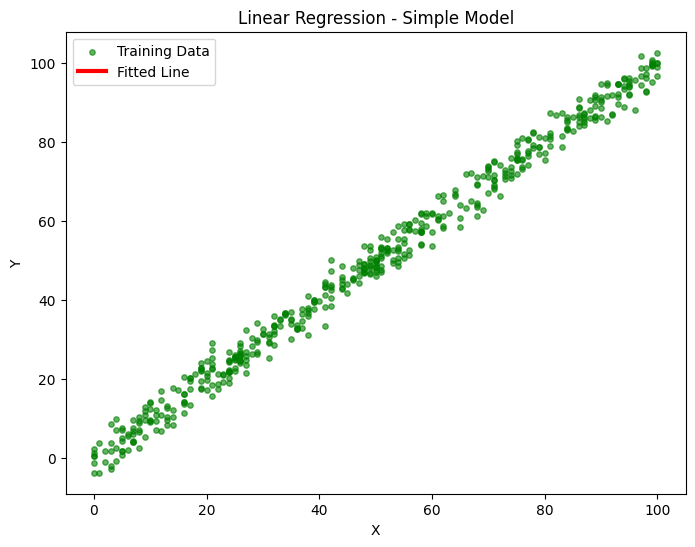

In [18]:
plt.figure(figsize=(8, 6))

# Plot training data with smaller points and some transparency
plt.scatter(train_input, train_output, color='green', s=15, alpha=0.6, label='Training Data')

# Generate smooth line points
x_line = np.linspace(min(train_input), max(train_input), 100)
y_line = model.predict(x_line)

# Draw the fitted line on top with higher width
plt.plot(x_line, y_line, color='red', linewidth=3, label='Fitted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression - Simple Model')
plt.legend()
plt.show()
